<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/visualization/RO4_SO1_REIMS_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REIMS Visualization

Mount the google drive where the closed-source dataset is safely and privately stored.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive')

Mounted at /content/drive


['Colab Notebooks',
 'University',
 'AI',
 'profile.jpg',
 'personal',
 'ass3_example_solutions_marking_guides_2023_V2.docx',
 'JAPA101: Handwriting Assignment - Part 2 - Creative Writing and Reflection.gdoc']

## Load the data

To load an xlsx file into memory using Python, you can use the pandas library. The pandas library provides a read_excel() function that can be used to read an xlsx file into a DataFrame object.

This code will join the strings in the path_array variable and print the resulting joined path. The output will be /usr/local/bin.

Note that the * operator is used to unpack the path_array variable so that each element in the array is passed as a separate argument to the os.path.join() function. This allows the function to join the strings in the array together to form a valid path.

To convert the feature names (column names) of a Pandas DataFrame to strings, you can use the DataFrame.columns.astype(str) method. This will convert the column names to strings and return a new index object.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = ['drive', 'MyDrive', 'AI', 'fish', 'REIMS_data.xlsx']
path = os.path.join(*path)

# Load the dataset
data = pd.read_excel(path)

## Log scaled heatmap

To create a log-scaled heatmap for your mass spectrometry data, you will need to follow these steps:

1. **Load the Data:** Import the dataset from your Excel file.
2. **Group and Average the Data:** Group the data by class labels and calculate the average intensity for each mass-to-charge ratio.
3. **Apply Log Scaling:** Apply a logarithmic transformation to the data to enhance visibility and interpretability.
4. **Create the Heatmap:** Use seaborn or matplotlib to create the heatmap.
Here's how you can implement it in Python:

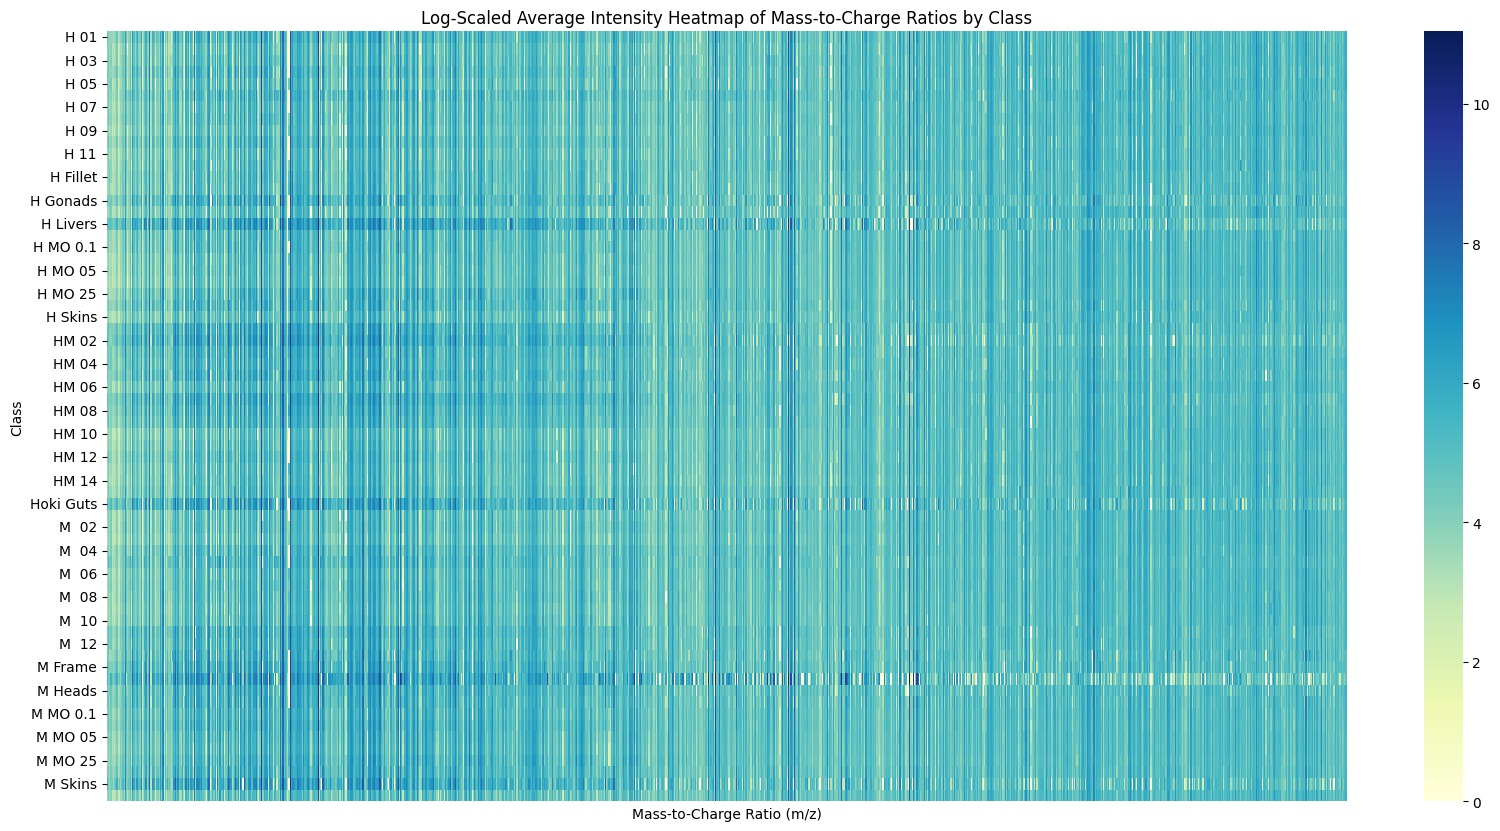

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel(path)

# Grouping by class and calculating mean for each m/z ratio
grouped_data = data.groupby('m/z').mean()

# Applying a logarithmic scale to the data
# Adding a small constant before taking log to avoid log(0)
log_data = np.log(grouped_data + 1)

# Creating the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(log_data, cmap='YlGnBu')  # You can choose other colormaps like 'coolwarm', 'Blues', etc.

# Enhancing the plot for better readability
plt.title('Log-Scaled Average Intensity Heatmap of Mass-to-Charge Ratios by Class')
plt.xlabel('Mass-to-Charge Ratio (m/z)')
plt.ylabel('Class')
plt.xticks([])  # Optionally hiding the x-axis labels for simplicity
plt.yticks(rotation=0)  # Making y-axis labels horizontal for readability

plt.show()

## Dark Majicks

GPT
Certainly! Below is the Python code that includes both the pre-processing of the Excel spreadsheet and the generation of the histogram. This code is structured to:

1. **Load the Dataset:** Read the Excel file and load it into a pandas DataFrame.
2. **Filter the Data:** Exclude samples labeled as a mix of Hoki and Mackerel ("HM").
4. **Segregate the Data**: Separate the data into two groups based on class labels for Hoki and Moki.
5. **Calculate Average Intensities:** Compute the average intensities for each mass-to-charge ratio for both Hoki and Moki.
Select a Subset of m/z Ratios: For visualization purposes, a subset of mass-to-charge ratios is chosen.
6. **Generate the Histogram:** Create a histogram comparing the average intensities for Hoki and Moki across the selected m/z ratios.
Here's the complete code:

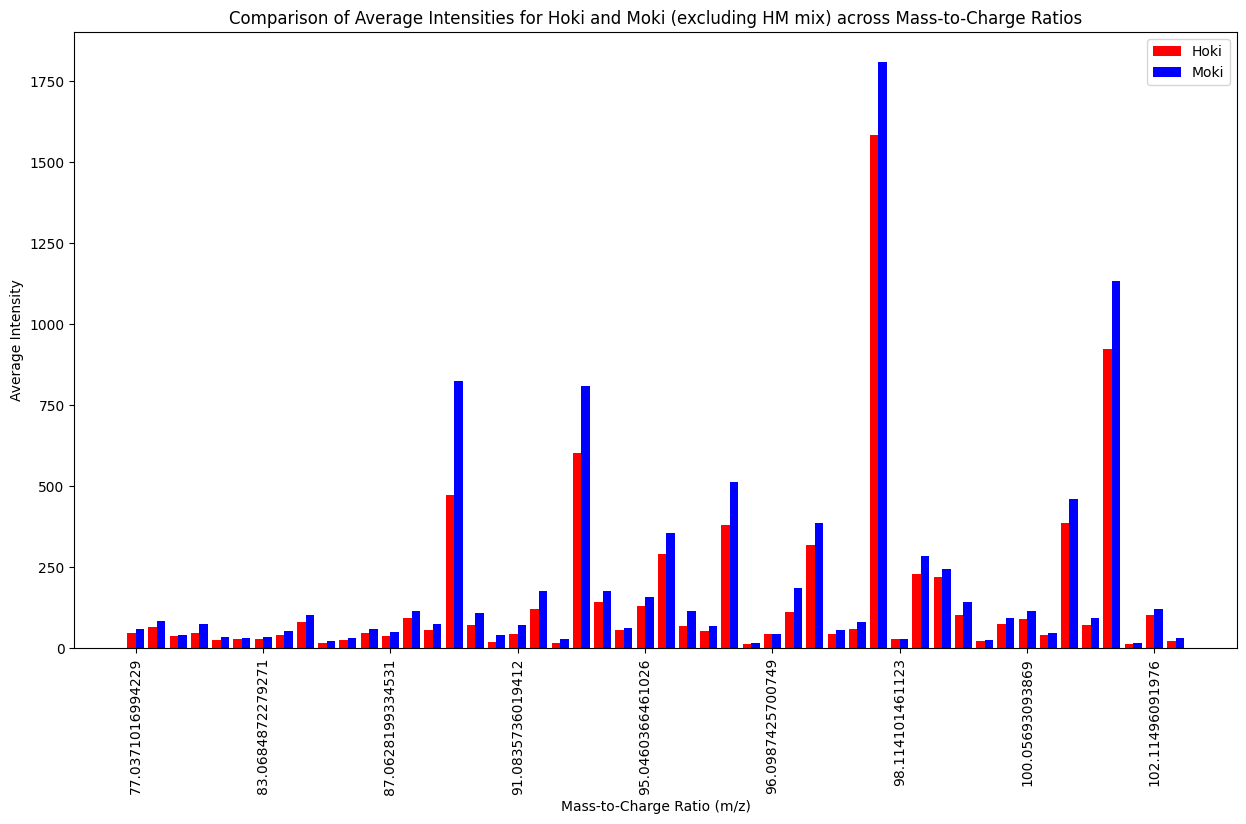

In [ ]:
# Filtering out 'HM' labels
filtered_data = data[~data['m/z'].str.startswith('HM')]

# Segregating the data for Hoki and Moki
hoki_data = filtered_data[filtered_data['m/z'].str.startswith('H')].drop('m/z', axis=1)
moki_data = filtered_data[filtered_data['m/z'].str.startswith('M')].drop('m/z', axis=1)

# Calculating the average intensities
average_hoki = hoki_data.mean()
average_moki = moki_data.mean()

# Selecting a subset of m/z ratios for the histogram
subset_size = 50  # Adjust this as needed
selected_mz = average_hoki.index[:subset_size]

# Extracting the values for the selected m/z ratios
hoki_values = average_hoki[selected_mz]
moki_values = average_moki[selected_mz]

# Setting up the histogram
plt.figure(figsize=(15, 8))

# Plotting histograms for each m/z ratio
for i, mz in enumerate(selected_mz):
    plt.bar(i - 0.2, hoki_values[mz], width=0.4, color='red', label='Hoki' if i == 0 else "")
    plt.bar(i + 0.2, moki_values[mz], width=0.4, color='blue', label='Moki' if i == 0 else "")

# Adding plot details
plt.xlabel('Mass-to-Charge Ratio (m/z)')
plt.ylabel('Average Intensity')
plt.title('Comparison of Average Intensities for Hoki and Moki (excluding HM mix) across Mass-to-Charge Ratios')
plt.xticks(range(len(selected_mz)), selected_mz, rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()

plt.show()


# Intuition - "Moki is more!"

## Method

### Jesse explains

By visualizing the dataset, with the histogram above, we see "Moki is more". For every bin of 50 mass-to-charge ratios, on average, moki is larger. We could easily classify a moki instance by comparing its individual mass-to-charge ratios, to the sample mean $\mu$ for "Hoki" and "Mackeral".

This could be fomalized as to perform a summation, with "+1" for closer Mackeral or higher, "0" for in between, or "-1" for Hoki or lower. The more "0" values, the more uncertainty, or confidence the model should have. Should the sum be negative and large, the model predicts "Mackeral". Vice versa, should the sum be positive and large, the model predicts "Hoki". However, should the sum be close-to-zero and small, the model predicts "Hoki" or "Mackerl", but with low confidence.

### ChatGPT-4 explains

Your proposed method for classifying a sample as either Hoki or Moki based on mass-to-charge ratios is a straightforward and intuitive approach. It's essentially a simple scoring system based on the distance of a sample's intensities from the average intensities of known Hoki and Moki samples. Here's a step-by-step breakdown of how this could be implemented:

Calculate Sample Means (μ): Compute the average intensities for each mass-to-charge ratio for both Hoki and Moki, as already done.

Scoring System:

For each mass-to-charge ratio in a new sample, compare its intensity with the average intensities of Hoki and Moki.
Assign a score of "+1" if the intensity is closer to or higher than the average for Moki, "-1" if it's closer to or lower than the average for Hoki, and "0" if it's in between.
Summation:

Sum these scores across all mass-to-charge ratios.
A large negative sum suggests the sample is likely Hoki, a large positive sum suggests Moki, and a sum close to zero (with many "0" scores) indicates uncertainty.
Classification:

Based on the sum, classify the sample as Hoki, Moki, or uncertain. The magnitude of the sum could also be used as a measure of confidence in the classification.
Thresholds for Decision:

Decide on thresholds for what constitutes a "large" positive or negative sum, and what is considered "close to zero". These thresholds can be set based on the distribution of scores in your training data.
This method is a form of simple decision-making rule, akin to a basic machine learning classification algorithm. It's particularly suitable for cases where interpretability is important, as the rationale behind each classification is clear and straightforward.

### Code

To create a simple classifier based on the described method, we will write a Python class with fit and predict methods.

This class will:

- **fit method:** Learn the average intensities for Hoki and Moki from the training data.
- **predict method:** Classify new samples based on their mass-to-charge ratios using the scoring system you described.

We will use pandas for data handling and numpy for numerical operations. Here's how the class can be structured:

## Without binning

## With Binning

In [ ]:
class SimpleMSClassifier:
    def __init__(self, bin_size=50):
        self.avg_intensities = {}
        self.bin_size = bin_size

    def _bin_data(self, X):
        """ Bin the data in groups of 'bin_size' m/z ratios. """
        return X.groupby(np.arange(len(X.columns)) // self.bin_size, axis=1).mean()

    def fit(self, X, y):
        """ Learn the average intensities for each bin from the training data. """
        X_binned = self._bin_data(X)
        for label in y.unique():
            self.avg_intensities[label] = X_binned[y == label].mean()

    def predict(self, X):
        """ Classify new samples based on the scoring system for each bin. """
        X_binned = self._bin_data(X)
        predictions = []
        for _, sample in X_binned.iterrows():
            scores = {}
            for label, avg_intensities in self.avg_intensities.items():
                score = sum([-1 if sample[binned_mz] > avg_intensities[binned_mz] else 0
                             for binned_mz in avg_intensities.index])
                scores[label] = score
            predictions.append(max(scores, key=scores.get))
        return predictions

# Example usage
data = pd.read_excel(path)
data = data[~data['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
X = data.drop('m/z', axis=1)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and fit the classifier
classifier = SimpleMSClassifier(bin_size=50)
classifier.fit(X_train, y_train)

# Predict on both training and testing sets
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Displaying results in a table
results_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
})

print(results_table)

    Dataset  Accuracy
0  Training  0.566667
1   Testing  0.583333


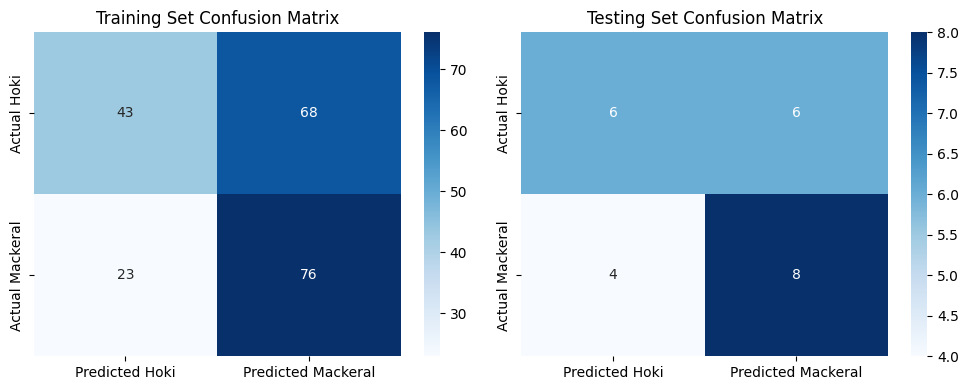

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_train=None, y_train_pred=None, y_test =None, y_test_pred=None):
    # Generate confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Plotting the confusion matrix for the training set
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)

    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Hoki', 'Predicted Mackeral'],
                yticklabels=['Actual Hoki', 'Actual Mackeral'])
    plt.title('Training Set Confusion Matrix')

    if y_test is not None:
        # Generate confusion matrice
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        # Plotting the confusion matrix for the testing set
        plt.subplot(1, 2, 2)
        sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Hoki', 'Predicted Mackeral'],
                    yticklabels=['Actual Hoki', 'Actual Mackeral'])
        plt.title('Testing Set Confusion Matrix')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_train=y_train, y_train_pred=train_predictions,
                      y_test=y_test, y_test_pred=test_predictions)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Example usage
data = pd.read_excel(path)
data = data[~data['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
X = data.drop('m/z', axis=1)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)

# Prepare the data
data = data[~data['m/z'].str.contains('HM')]
X = data.drop('m/z', axis=1)  # Features (intensities)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)  # Labels (0 for Hoki, 1 for Moki)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "SimpleMSClassifier": SimpleMSClassifier(bin_size=50),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Implementing 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {name: [] for name in classifiers}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, clf in classifiers.items():
        # Training
        clf.fit(X_train, y_train)
        # Predicting
        predictions = clf.predict(X_test)
        # Evaluating
        balanced_acc = balanced_accuracy_score(y_test, predictions)
        results[name].append(balanced_acc)

# Calculating average balanced accuracy
avg_results = {name: np.mean(acc) for name, acc in results.items()}

# Displaying results in a table
results_df = pd.DataFrame(list(avg_results.items()), columns=['Classifier', 'Average Balanced Accuracy'])
print(results_df)

            Classifier  Average Balanced Accuracy
0   SimpleMSClassifier                   0.578040
1  Logistic Regression                   0.990909
2                  SVM                   0.974576
3        Random Forest                   0.987288
4                  KNN                   0.941016
5        Decision Tree                   0.996000
